# Auxiliar: Minimizacion de funciones usando Python

En Astronomia, nosotros tenemos diferentes modelos que describen fenomenos fisicos, pero tambien tenemos (ojala) muchos datos que nos indican la "realidad" del objeto que observamos. Los datos que tomamos son un reflejo de los procesos que ocurren en el objeto que estudiamos. 

En nuestro caso, esos objetos son nubes moleculares y gas que gira alrededor del centro galactico. 

La relacion que existe entre nuestros modelos y los datos es que, segun los procesos fisicos que nos interesen, estos nos dicen que datos podrian surgir de ellos en un caso ideal. Por ejemplo, sabemos que si la masa esta distribuida en una esfera, esperamos un perfil de velocidad de la forma $v(r) = \sqrt(4 G \pi r^2 \rho_0 / 3)$. No obstante, los datos fueron tomados sin considerar ningun modelo, simplemente mirando el objeto. Por lo tanto, queremos saber que tan bien calza nuestro modelo ideal con los datos "reales". Para esto, encontraremos los parametros de nuestro modelo que hacen que se ajuste mejor a los datos.

Hay varias formas de ajustar una curva a un set de puntos. Dependiendo de las caracteristicas de nuestros datos (por ejemplo, si tienen errores en solo un eje, en los dos ejes o en ninguno) hay diferentes metodos para ajustar la curva que funcionan mejor. En Astroinformatica veran mas al respecto.

Por ahora, el metodo mas comun es la minimizacion de $\chi^2$. 

## ¿Que es $\chi^2$?

$\chi^2$ es una distribucion de probabilidad. (probablemente la vieron en Probabilidad y Estadistica) Describe como se distribuye el valor de la variable independiente $X = Z_1^2+...+Z_k^2$, donde $Z$ para nuestro caso son los errores cuadraticos. Por lo general, $\chi^2$ evalua que tan distintos son las desviaciones entre el dato real y el teorico con el error del dato real:

$\chi^2 = \Sigma (y_{model}-y_{data})^2 / \sigma_i^2$

Como en este caso no tenemos errores y solo queremos ajustar una linea cercana a los puntos, usamos un valor de $\chi^2$ sin errores:

$\chi^2 = \Sigma (y_{model}-y_{data})^2 $

## Como ajustar una curva a un set de datos

El problema que queremos solucionar es el de encontrar la curva que nos entregue el minimo valor de $\chi^2$. En cursos mas avanzados (como Optimizacion) se ven las soluciones matematicas a problemas de minimizacion. Por ahora, lo que tenemos que saber es que hay distintas funciones implementadas en Python en la libreria scipy.

Hoy veremos como aplicar distintas funciones para solucionar este problema. Ustedes pueden elegir la que quieran para la tarea.

In [1]:
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

## La funcion fmin

La primera funcion que vamos a ver se llama optimize.fmin: lo que hace es minimizar una funcion, encontrando los parametros que la hacen alcanzar su valor minimo. Para poder usarla, tienen que fijarse que en la funcion que le entreguen, exista un valor minimo o si no se va a caer.

In [3]:
from scipy.optimize import fmin

Vamos a generar una funcion aleatoria que se asemeje a una linea. Recordemos que la funcion de una linea recta es $y = mx + b$:

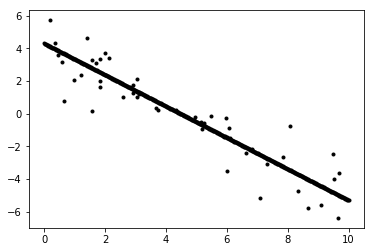

In [47]:
sp.random.seed(42)

m_true = -0.9594
b_true = 4.294

f_true = 0.534
N = 50
x = sp.sort(10*sp.random.rand(N)) # seleccion aleatoria de eje x
y = m_true * x + b_true 
y += sp.absolute(f_true*y) * sp.random.randn(N) # seleccion aleatoria de eje y

x0=sp.linspace(0, 10, 500)
plt.plot(x, y, 'k.')
plt.plot(x0,m_true*x0+b_true, 'k.')
plt.show()

La funcion fmin recibe la funcion que se debe minimizar. Por lo tanto, tenemos que escribir la funcion $\chi^2$:

In [48]:
def chi_cuadrado(params):
    m, b = params
    y_model = m * x + b
    y_data = y
    a = 0
    for i in range(len(y_data)):
        a += (y_model[i] - y[i]) ** 2
    return a

In [54]:
initial = sp.array([m_true, b_true]) + 0.1*sp.random.randn(2)
optimo = fmin(chi_cuadrado, initial)

Optimization terminated successfully.
         Current function value: 67.576946
         Iterations: 32
         Function evaluations: 62


In [53]:
optimo

array([-0.92515252,  4.08045713])

Veamos como queda la funcion con los parametros que acabamos de estimar.

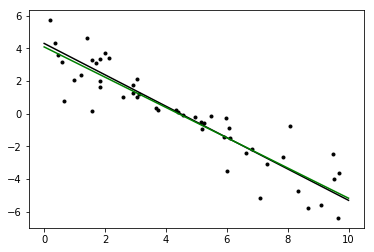

In [55]:
m_est = optimo[0]
b_est = optimo[1]

plt.plot(x, y, 'k.')
plt.plot(x0,m_true*x0+b_true, 'k-')
plt.plot(x0, m_est*x0+b_est, 'g-')
plt.show()

## La funcion minimize

Otra funcion que podemos utilizar es optimize.minimize. Esta funcion recibe una funcion a minimizar, pero esta debe tener otra forma. Por lo cual, tenemos que redefinir la funcion que teniamos antes.

In [56]:
from scipy.optimize import minimize
def chi_minimize(params, x, y):
    m, b = params
    y_model = m * x + b
    y_data = y
    a = 0
    for i in range(len(y_data)):
        a += (y_model[i] - y_data[i]) ** 2
    return a

In [58]:
initial = sp.array([m_true, b_true]) + 0.1*sp.random.randn(2)
optimo2 = minimize(chi_minimize, initial, args=(x, y)) # x e y son los datos, no modelo

In [59]:
optimo2

      fun: 67.57694570483076
 hess_inv: array([[ 0.00122273, -0.00545243],
       [-0.00545243,  0.03431369]])
      jac: array([ 9.53674316e-07, -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([-0.92515135,  4.08044121])

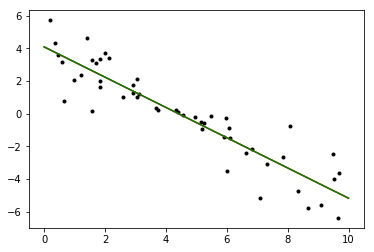

In [61]:
parametros = optimo2.x

plt.plot(x, y, 'k.')
#plt.plot(x0,m_true*x0+b_true, 'k.')
plt.plot(x0, parametros[0]*x0+parametros[1], 'r-')
plt.show()

## La funcion leastsq

Lo que hace esta funcion es minimizar la suma de los cuadrados de una funcion. Tenemos que escribir otra forma de la funcion que queremos minimizar con respecto a las anteriores

In [62]:
from scipy.optimize import leastsq
y_data = y
x_data = x

def chi(params):
    m, b = params
    return y_data - m*x_data - b

In [65]:
initial = sp.array([m_true, b_true]) + 0.1*sp.random.randn(2)
optimo3 = leastsq(chi, initial)

In [66]:
optimo3

(array([-0.92515134,  4.08044116]), 2)

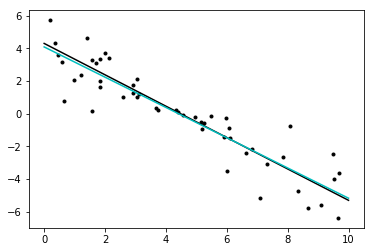

In [67]:
parametros3 = optimo3[0]

plt.plot(x, y, 'k.')
plt.plot(x0,m_true*x0+b_true, 'k-')
plt.plot(x0, parametros3[0]*x0+parametros3[1], 'c-')
plt.show()

## La funcion curve_fit

Tambien existe una funcion que se llama curve_fit, que recibe una funcion modelo y los valores de x e y, sin necesidad de hacer nosotros una evaluacion $\chi^2$ porque ya la trae implementada.

In [68]:
from scipy.optimize import curve_fit

def linea(x, *params):
    m, b = params
    return m*x+b

In [69]:
initial = sp.array([m_true, b_true]) + 0.1*sp.random.randn(2)
optimo4 = curve_fit(linea, x, y, p0=initial)

In [70]:
optimo4

(array([-0.92515134,  4.08044116]), array([[ 0.00344284, -0.01535244],
        [-0.01535244,  0.09661726]]))

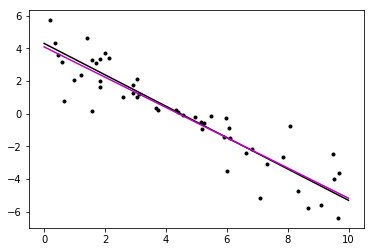

In [71]:
parametros4 = optimo4[0]

plt.plot(x, y, 'k.')
plt.plot(x0,m_true*x0+b_true, 'k-')
plt.plot(x0, parametros4[0]*x0+parametros4[1], 'm-')
plt.show()